In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [15]:

#Primera toma, bobina constante a 4A y espira cambiante
m1 = np.array([30,37.5,60,67.5,97.5]) #(mg)
i1 = np.array([1,1.5,2,2.5,3]) #(mg)
#Segundo toma, espira constante a 2A y bobina cambiante
m2 = np.array([22.5,30,37.5,45,52.5,60,67.5]) #(A)
i2 = np.array([1,1.5,2,2.5,3,3.5,4]) #(A)
#Otras medidas
l1 = 0.145 #longitud bobina de solenoide (m)
l2=0.038 #longitud anche de espira (m)

for i in range(len(m1)):
    m1[i]=(m1[i]*pow(10,-5))*9.807
for i in range(len(m2)):
    m2[i]=(m2[i]*pow(10,-5))*9.807
    
for i in range(len(i1)):
    i1[i]=i1[i]*0.038
    
for i in range(len(i2)):
    i2[i]=i2[i]*0.143

tabla1 = pd.DataFrame({
    'I1':i1,'m1':m1})
tabla2 = pd.DataFrame({
    'I2':i2,'m2':m2
})
tabla1,tabla2

(      I1        m1
 0  0.038  0.002942
 1  0.057  0.003678
 2  0.076  0.005884
 3  0.095  0.006620
 4  0.114  0.009562,
        I2        m2
 0  0.1430  0.002207
 1  0.2145  0.002942
 2  0.2860  0.003678
 3  0.3575  0.004413
 4  0.4290  0.005149
 5  0.5005  0.005884
 6  0.5720  0.006620)

Pendiente (slope): 0.08516605263157895
Intersección (intercept): -0.0007355249999999999
Coeficiente de correlación (r): 0.976092160357725
Coeficiente de determinación (R^2): 0.9527559055118107
Valor p (p-value): 0.004421613227408328
Error estándar (std_err): 0.01094936242594184


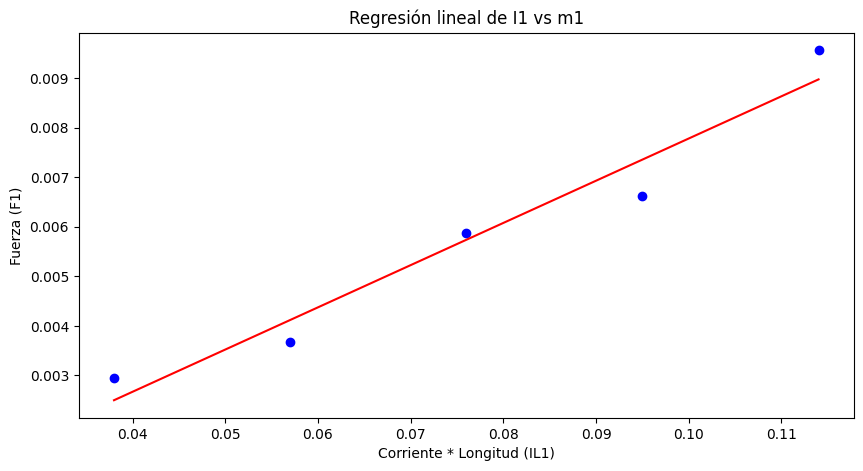

In [16]:
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err


modelo, pendiente, interseccion, r_cuadrado, valor_p, error_std = linear_regression(i1, m1)


plt.figure(figsize=(10, 5))
plt.scatter(i1, m1, color='blue', label='Datos experimentales')
plt.plot(i1, modelo(np.array(i1)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente * Longitud (IL1)')
plt.ylabel('Fuerza (F1)')
plt.title('Regresión lineal de I1 vs m1')
#plt.legend()
plt.show()

Pendiente (slope): 0.010287062937062939
Intersección (intercept): 0.0007355250000000003
Coeficiente de correlación (r): 1.0
Coeficiente de determinación (R^2): 1.0
Valor p (p-value): 1.9206748078018256e-50
Error estándar (std_err): 0.0


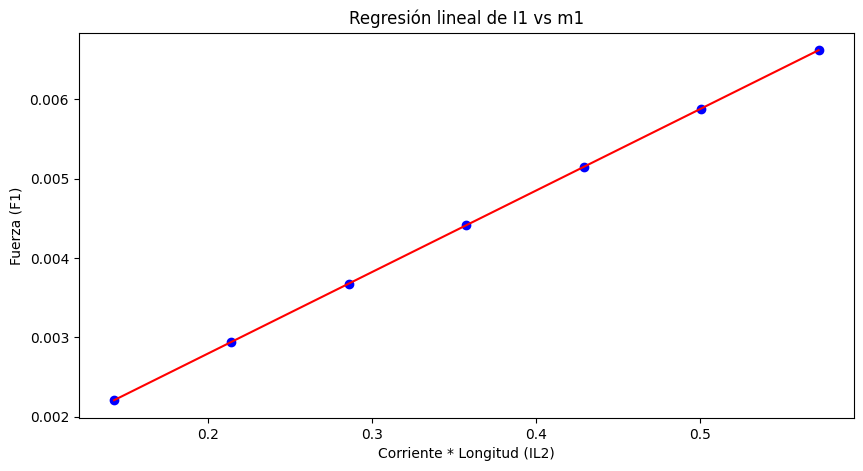

In [17]:
def linear_regression1(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err

modelo, pendiente, interseccion, r_cuadrado, valor_p, error_std = linear_regression1(i2, m2)


plt.figure(figsize=(10, 5))
plt.scatter(i2, m2, color='blue', label='Datos experimentales')
plt.plot(i2, modelo(np.array(i2)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente * Longitud (IL2)')
plt.ylabel('Fuerza (F1)')
plt.title('Regresión lineal de I1 vs m1')
#plt.legend()
plt.show()